<a href="https://colab.research.google.com/github/Nikunj-adsum24/personalce800/blob/main/fetal_health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score
from google.colab import files

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
np.random.seed(0)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
data = pd.read_csv("fetal_health.csv")
#data = files.upload(fetal_health.csv)
#from google.colab import files
#data_to_load = files.upload()
#import io
#data = pd.read_csv(io.BytesIO(data_to_load['fetal_health.csv']))
data.head()
data.describe()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


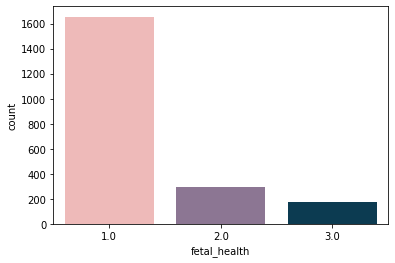

In [5]:

# TODO: 1. Check the distribution [Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)] of target label 'fetal_health' using a SNS Countplot
#
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

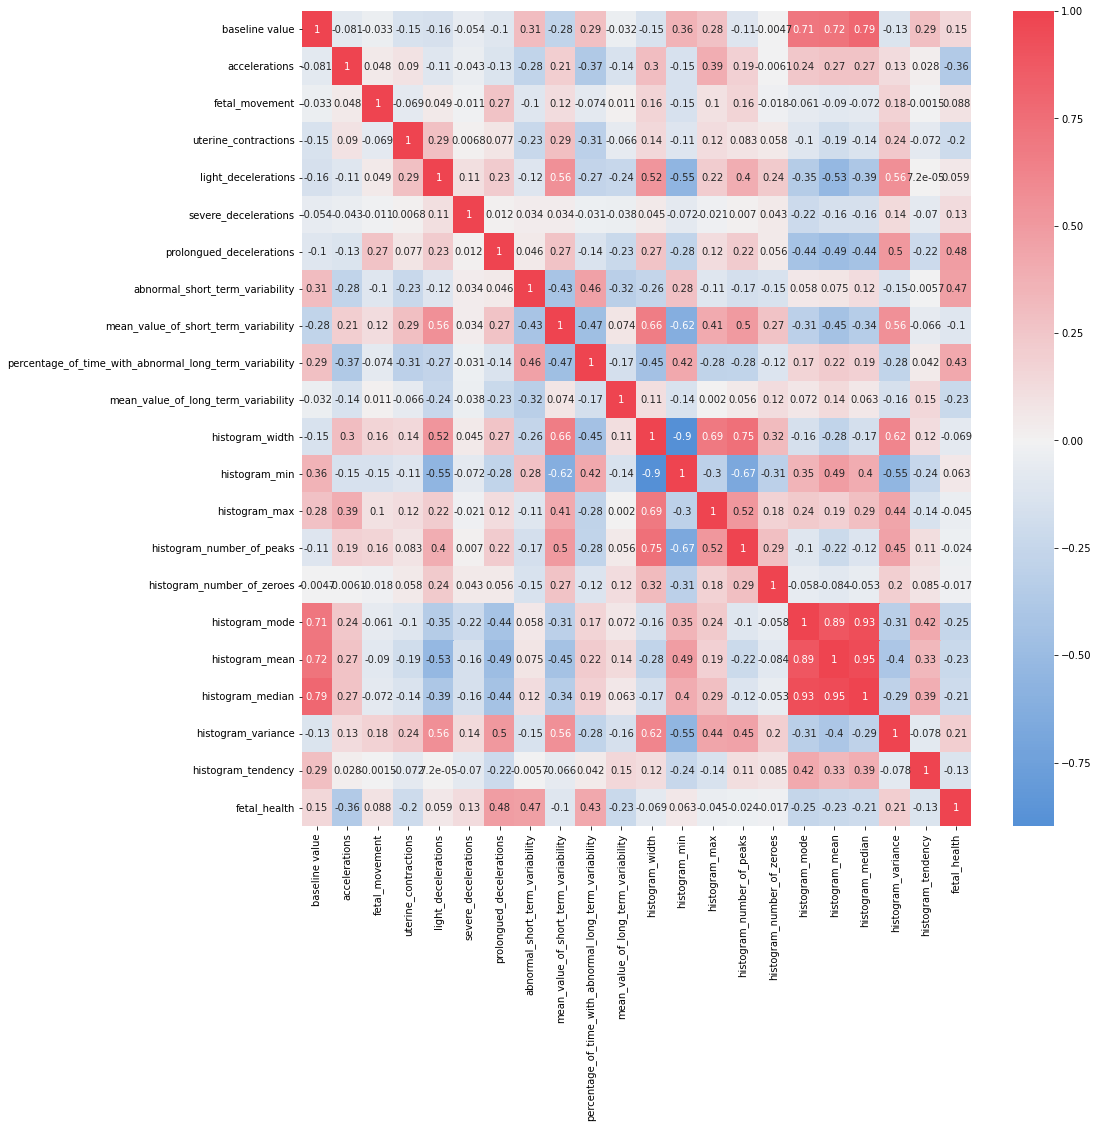

In [3]:
# TODO: 2. Find the top 3 input features based on the correlation matrix by plotting a SNS heatmap.
#
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [4]:

X = data.drop(['fetal_health'], axis=1)
y = data["fetal_health"]

train_size, num_features = X.shape
num_labels = 3

# TODO: 3. Use Scikit-Learn Standard Scaler to normalize the input features.
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,4.161509e-16,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-1.803982e-16,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.958452e-15,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-2.625683e-15,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.127706e-15,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,7.254767e-16,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,4.324961e-15,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,2.687304e-16,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,-2.481552e-16,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,2.291362e-15,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


In [5]:
# Split the dataset into a training set (80%) and a test set (20%) using train_test_split() from sklearn library.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# TODO: 4. Use Scikit-Learn's LogisticRegression 
# set these three parameters to enable the Softmax Regression algorithm:
#   multi_class="multinomial"
#   solver="lbfgs"
#   C=10
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr_model= LogisticRegression(C=10, solver='lbfgs',multi_class='multinomial', max_iter=4000)

lr_model.fit(X_train, y_train)

# TODO: 5. Compute these scores

predictions=lr_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
cf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ")
print(cf_matrix)

Accuracy    :  0.8849765258215962
Recall      :  0.8849765258215962
Precision   :  0.8809569858814997
Confusion Matrix: 
[[317  13   3]
 [ 21  37   6]
 [  1   5  23]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
